### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
print("Faturamento Total:")
print("Loja 1:", loja['Preço'].sum())
print("Loja 2:", loja2['Preço'].sum())
print("Loja 3:", loja3['Preço'].sum())
print("Loja 4:", loja4['Preço'].sum())

Faturamento Total:
Loja 1: 1534509.12
Loja 2: 1488459.06
Loja 3: 1464025.03
Loja 4: 1384497.58


# 2. Vendas por Categoria


In [ ]:
def vendas_por_categoria(df, nome_loja):
    return df['Categoria do Produto'].value_counts().rename(nome_loja)

categorias = pd.concat([
    vendas_por_categoria(loja, 'Loja 1'),
    vendas_por_categoria(loja2, 'Loja 2'),
    vendas_por_categoria(loja3, 'Loja 3'),
    vendas_por_categoria(loja4, 'Loja 4')
], axis=1).fillna(0)

categorias

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
moveis,465,442,499,480
eletronicos,448,422,451,451
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
utilidades domesticas,171,181,177,201


# 3. Média de Avaliação das Lojas

In [ ]:
print("Média de Avaliação:")
print("Loja 1:", loja['Avaliação da compra'].mean())
print("Loja 2:", loja2['Avaliação da compra'].mean())
print("Loja 3:", loja3['Avaliação da compra'].mean())
print("Loja 4:", loja4['Avaliação da compra'].mean())

Média de Avaliação:
Loja 1: 3.976685036032217
Loja 2: 4.037303942348453
Loja 3: 4.048325561678677
Loja 4: 3.9957591178965224


# 4. Produtos Mais e Menos Vendidos

In [ ]:

# Produtos Mais e Menos Vendidos - visualização amigável
def extremos_vendas(df, nome_loja):
    contagem = df['Produto'].value_counts()
    return {
        'Loja': nome_loja,
        'Mais vendido': contagem.idxmax(),
        'Menos vendido': contagem.idxmin()
    }

# Criar DataFrame com os resultados
dados_extremos = [
    extremos_vendas(loja, 'Loja 1'),
    extremos_vendas(loja2, 'Loja 2'),
    extremos_vendas(loja3, 'Loja 3'),
    extremos_vendas(loja4, 'Loja 4')
]

extremos_df = pd.DataFrame(dados_extremos)
print(extremos_df)

     Loja              Mais vendido      Menos vendido
0  Loja 1               Micro-ondas            Headset
1  Loja 2  Iniciando em programação  Jogo de tabuleiro
2  Loja 3             Kit banquetas   Blocos de montar
3  Loja 4                  Cama box           Guitarra


# 5. Frete Médio por Loja

In [ ]:
print("Frete Médio:")
print("Loja 1:", loja['Frete'].mean())
print("Loja 2:", loja2['Frete'].mean())
print("Loja 3:", loja3['Frete'].mean())
print("Loja 4:", loja4['Frete'].mean())

Frete Médio:
Loja 1: 34.69180491551149
Loja 2: 33.62194065817927
Loja 3: 33.07446427411743
Loja 4: 31.278997081841727


# Gráfico de Pizza –Distribuição do Faturamento Total por Loja

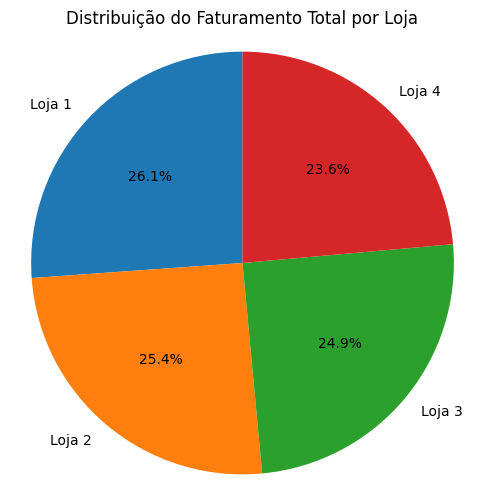

In [ ]:

import matplotlib.pyplot as plt

# Faturamento total
faturamentos = {
    'Loja 1': loja['Preço'].sum(),
    'Loja 2': loja2['Preço'].sum(),
    'Loja 3': loja3['Preço'].sum(),
    'Loja 4': loja4['Preço'].sum()
}

# Gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(faturamentos.values(), labels=faturamentos.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Distribuição do Faturamento Total por Loja')
plt.axis('equal')  # Para deixar o gráfico redondo
plt.show()

# Gráfico Barras Agrupadas – Vendas por Categoria

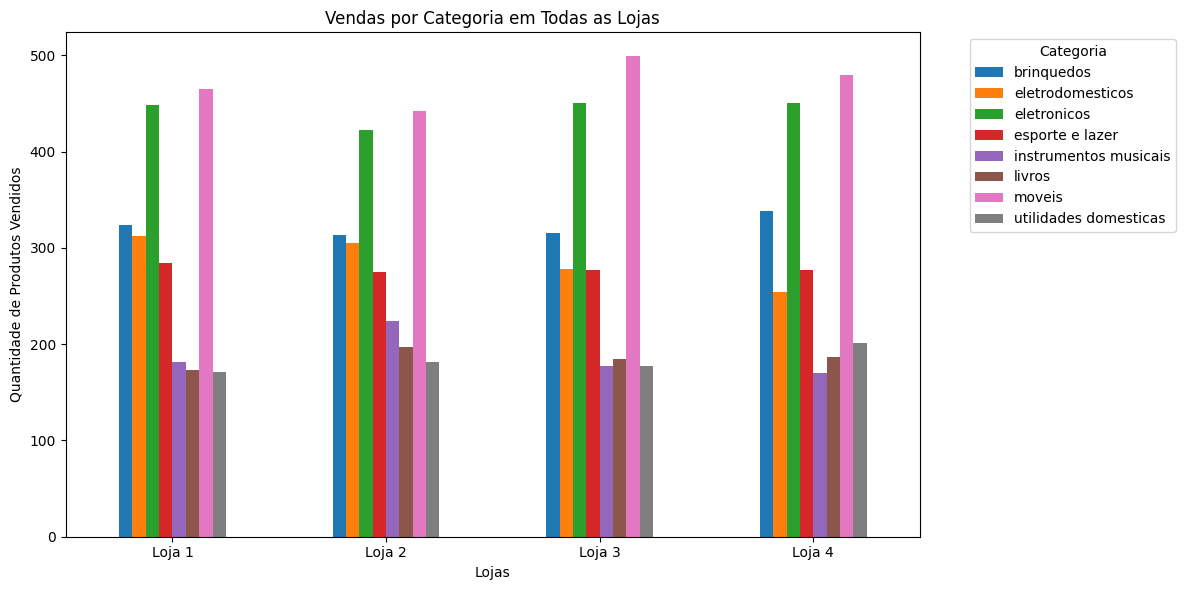

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Função para contar categorias por loja
def contar_categorias(df):
    return df['Categoria do Produto'].value_counts()

# Criar um DataFrame com todas as contagens
categorias_df = pd.DataFrame({
    'Loja 1': contar_categorias(loja),
    'Loja 2': contar_categorias(loja2),
    'Loja 3': contar_categorias(loja3),
    'Loja 4': contar_categorias(loja4)
}).fillna(0)

# Transpor para deixar categorias no eixo X
categorias_df = categorias_df.T

# Plot
categorias_df.plot(kind='bar', figsize=(12,6))
plt.title('Vendas por Categoria em Todas as Lojas')
plt.xlabel('Lojas')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.xticks(rotation=0)
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Gráfico de Dispersão – Frete Médio por Loja

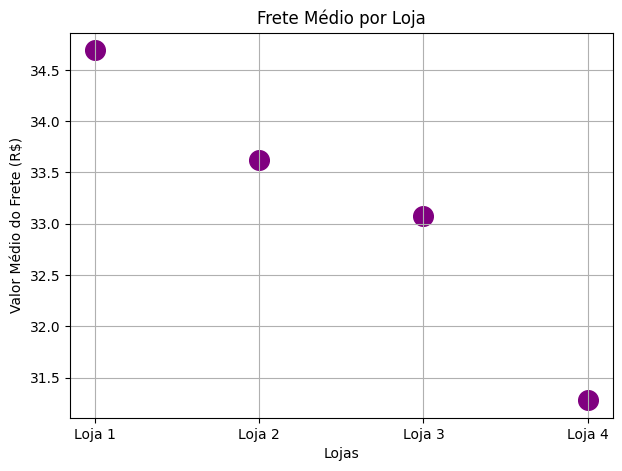

In [ ]:

import matplotlib.pyplot as plt

# Frete médio
fretes = {
    'Loja 1': loja['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean()
}

# Gráfico de dispersão
plt.figure(figsize=(7,5))
plt.scatter(fretes.keys(), fretes.values(), color='purple', s=200)
plt.title('Frete Médio por Loja')
plt.xlabel('Lojas')
plt.ylabel('Valor Médio do Frete (R$)')
plt.grid(True)
plt.show()

# Relatório Final

Objetivo
--------

Este relatório tem como finalidade auxiliar o Sr. João a decidir qual das quatro lojas da Alura Store deve ser vendida. A decisão baseia-se em métricas de desempenho como faturamento, avaliações, logística e popularidade dos produtos.

1. Faturamento Total por Loja
-----------------------------

- Loja 1: BRL 1.534.509,12  
- Loja 2: BRL 1.488.459,06  
- Loja 3: BRL 1.464.025,03  
- Loja 4: BRL 1.384.497,58  → **menor faturamento**

A Loja 4 teve o menor desempenho em receita, sugerindo um volume de vendas ou ticket médio inferior.

2. Categorias Mais Vendidas
----------------------------

As quatro lojas tiveram como categoria mais vendida:

- Móveis

Isso indica um padrão comum de consumo. Nenhuma loja se destacou pela diversidade ou exclusividade de categorias.

3. Média de Avaliação dos Clientes
----------------------------------

- Loja 1: 3,98 → **menor média**
- Loja 2: 4,04  
- Loja 3: 4,05  
- Loja 4: 4,00  

A Loja 1 teve a pior média de avaliação, o que pode indicar possíveis insatisfações com entrega, produto ou atendimento.

4. Produtos Mais e Menos Vendidos
---------------------------------

Loja 1  
• Mais vendido: TV Led UHD 4K  
• Menos vendido: Headset  

Loja 2  
• Mais vendido: Iniciando em programação  
• Menos vendido: Jogo de tabuleiro  

Loja 3  
• Mais vendido: Kit banquetas  
• Menos vendido: Blocos de montar  

Loja 4  
• Mais vendido: Cama box  
• Menos vendido: Guitarra  

5. Frete Médio
--------------

- Loja 1: BRL 34,69 → **maior frete médio**
- Loja 2: BRL 33,62  
- Loja 3: BRL 33,07  
- Loja 4: BRL 31,28  

Fretes elevados podem impactar negativamente a conversão e a satisfação dos clientes.

Conclusão e Recomendação
------------------------

Recomenda-se que o Sr. João **venda a Loja 4**, pois:

- Tem o menor faturamento entre as lojas.
- Embora não seja a pior avaliada, não se destaca em nenhum critério.
- Seu desempenho geral é o mais fraco.

Manter as lojas com melhor retorno financeiro e satisfação dos clientes é a melhor decisão para o futuro do negócio.

---

Relatório gerado com base em análise de dados utilizando Python, Pandas e Matplotlib.